In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
import scipy.stats
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print('There are {} rows in train and {} columns'.format(train.shape[0],train.shape[1]))
train.head()

There are 1460 rows in train and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
missing_percent = train.isnull().sum() / len(train) * 100
missing_percent =  missing_percent[missing_percent > 0]
missing_percent.sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

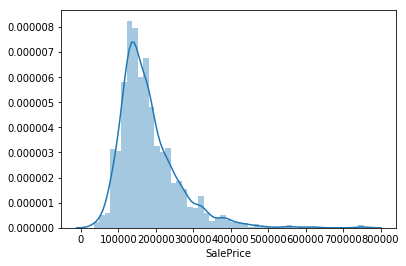

In [7]:
sns.distplot(train['SalePrice'])

* Distribution plot shows that sale price is right skewed
* Need to transform the target by taking the log scale

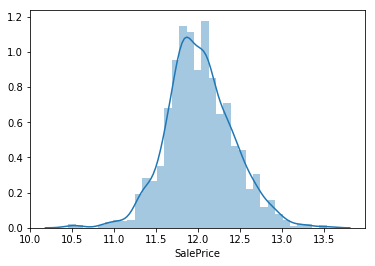

In [8]:
target = np.log(train['SalePrice'])
sns.distplot(target)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

* Notice the columns are separated into objects, floats, and ints
* Need to split data into categorical and numerical values

In [10]:
def num_cat():
    global numerical_data 
    global categorical_data
    numerical_data = train.select_dtypes(include = [np.number])
    categorical_data = train.select_dtypes(exclude = [np.number])
    return print ('There are {} numerical features and {} categorical features in the training data'\
      .format(numerical_data.shape[1],categorical_data.shape[1]))
    return numerical_data, categorical_data

In [11]:
num_cat()

There are 38 numerical features and 43 categorical features in the training data


## Correlation between the features

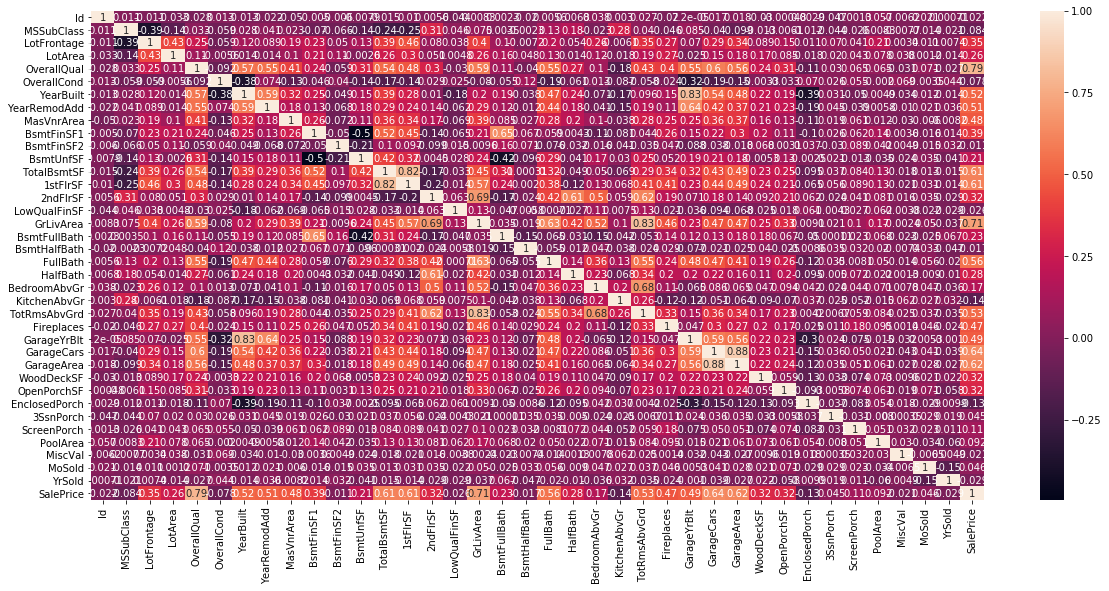

In [12]:
#correlation matrix
#find the correlation between each values
corr= numerical_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, annot=True);

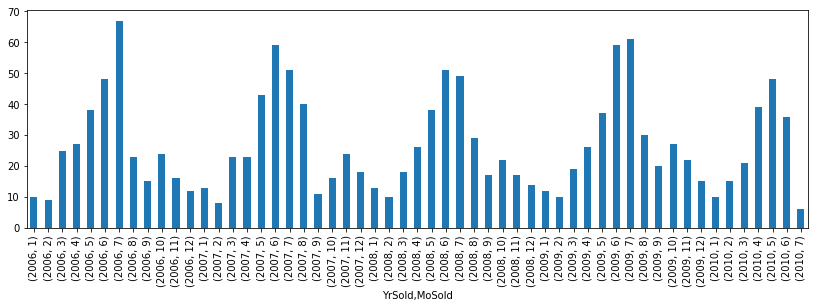

In [13]:
year_month = train.groupby(['YrSold','MoSold']).Id.count()
year_month.plot(kind='bar',figsize= (14,4))

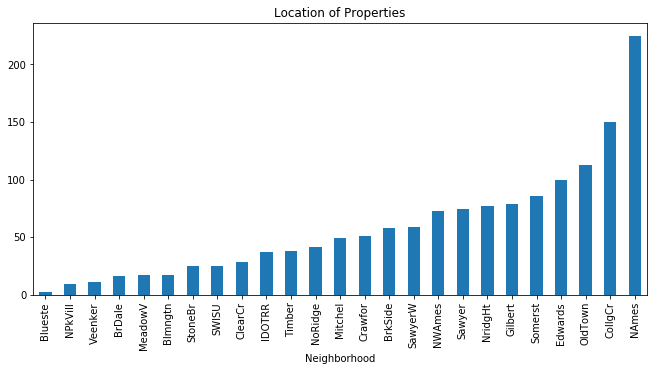

In [14]:
neighborhood = train.groupby('Neighborhood').Id.count().sort_values()
neighborhood.plot(kind='bar',figsize=(11,5))
plt.title("Location of Properties")
plt.show()

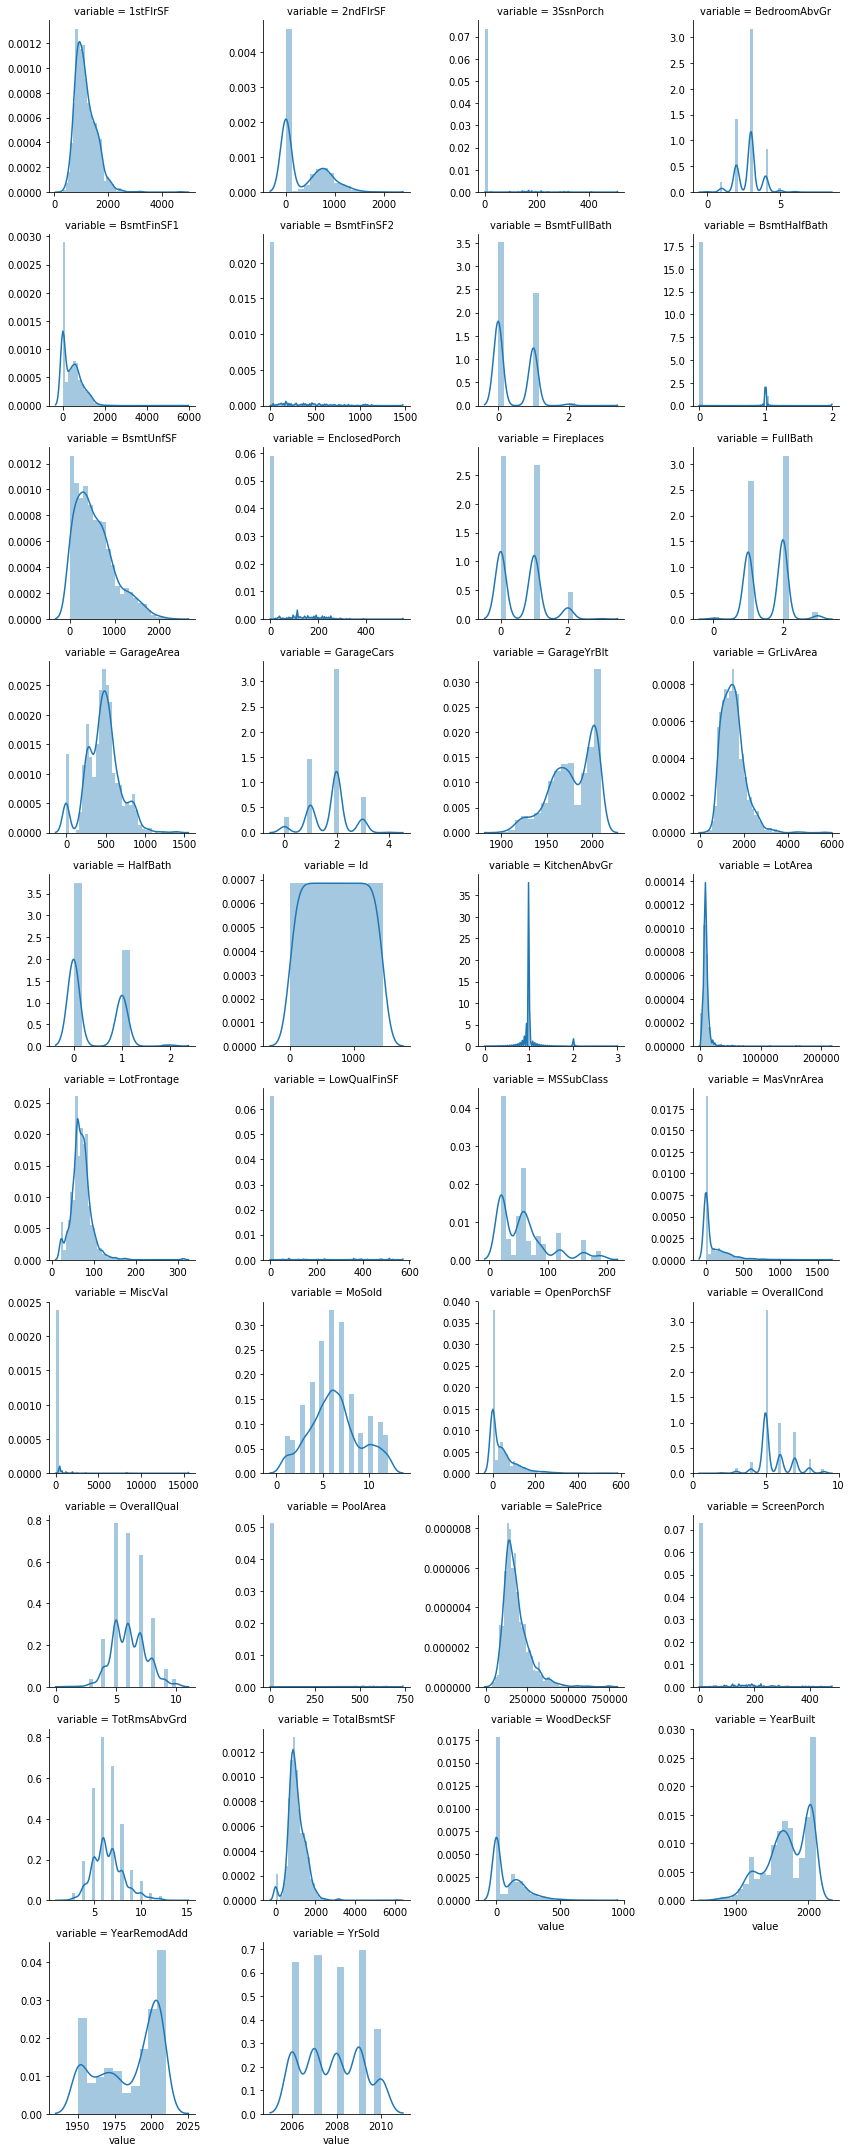

In [15]:
f = pd.melt(train, value_vars = sorted(numerical_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex = False, sharey=False)
g = g.map(sns.distplot,'value')

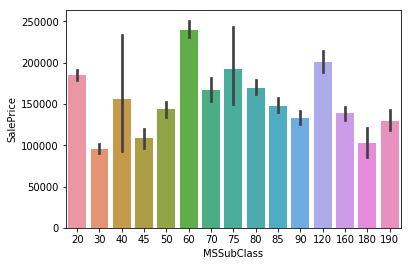

In [16]:
sns.barplot(x = 'MSSubClass', y= 'SalePrice', data=train)

In [17]:
def convert_cols(cols,type=str):
    for col in cols:
        train[col] = train[col].apply(lambda x:type(x))

* Convert some numerical features into categorical
* Convert MSSubClass, MoSold, YrSold

In [18]:
convert_cols(cols=['MSSubClass','MoSold','YrSold'],type =str)

In [19]:
num_cat()

There are 35 numerical features and 46 categorical features in the training data


C:\Users\jshyo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


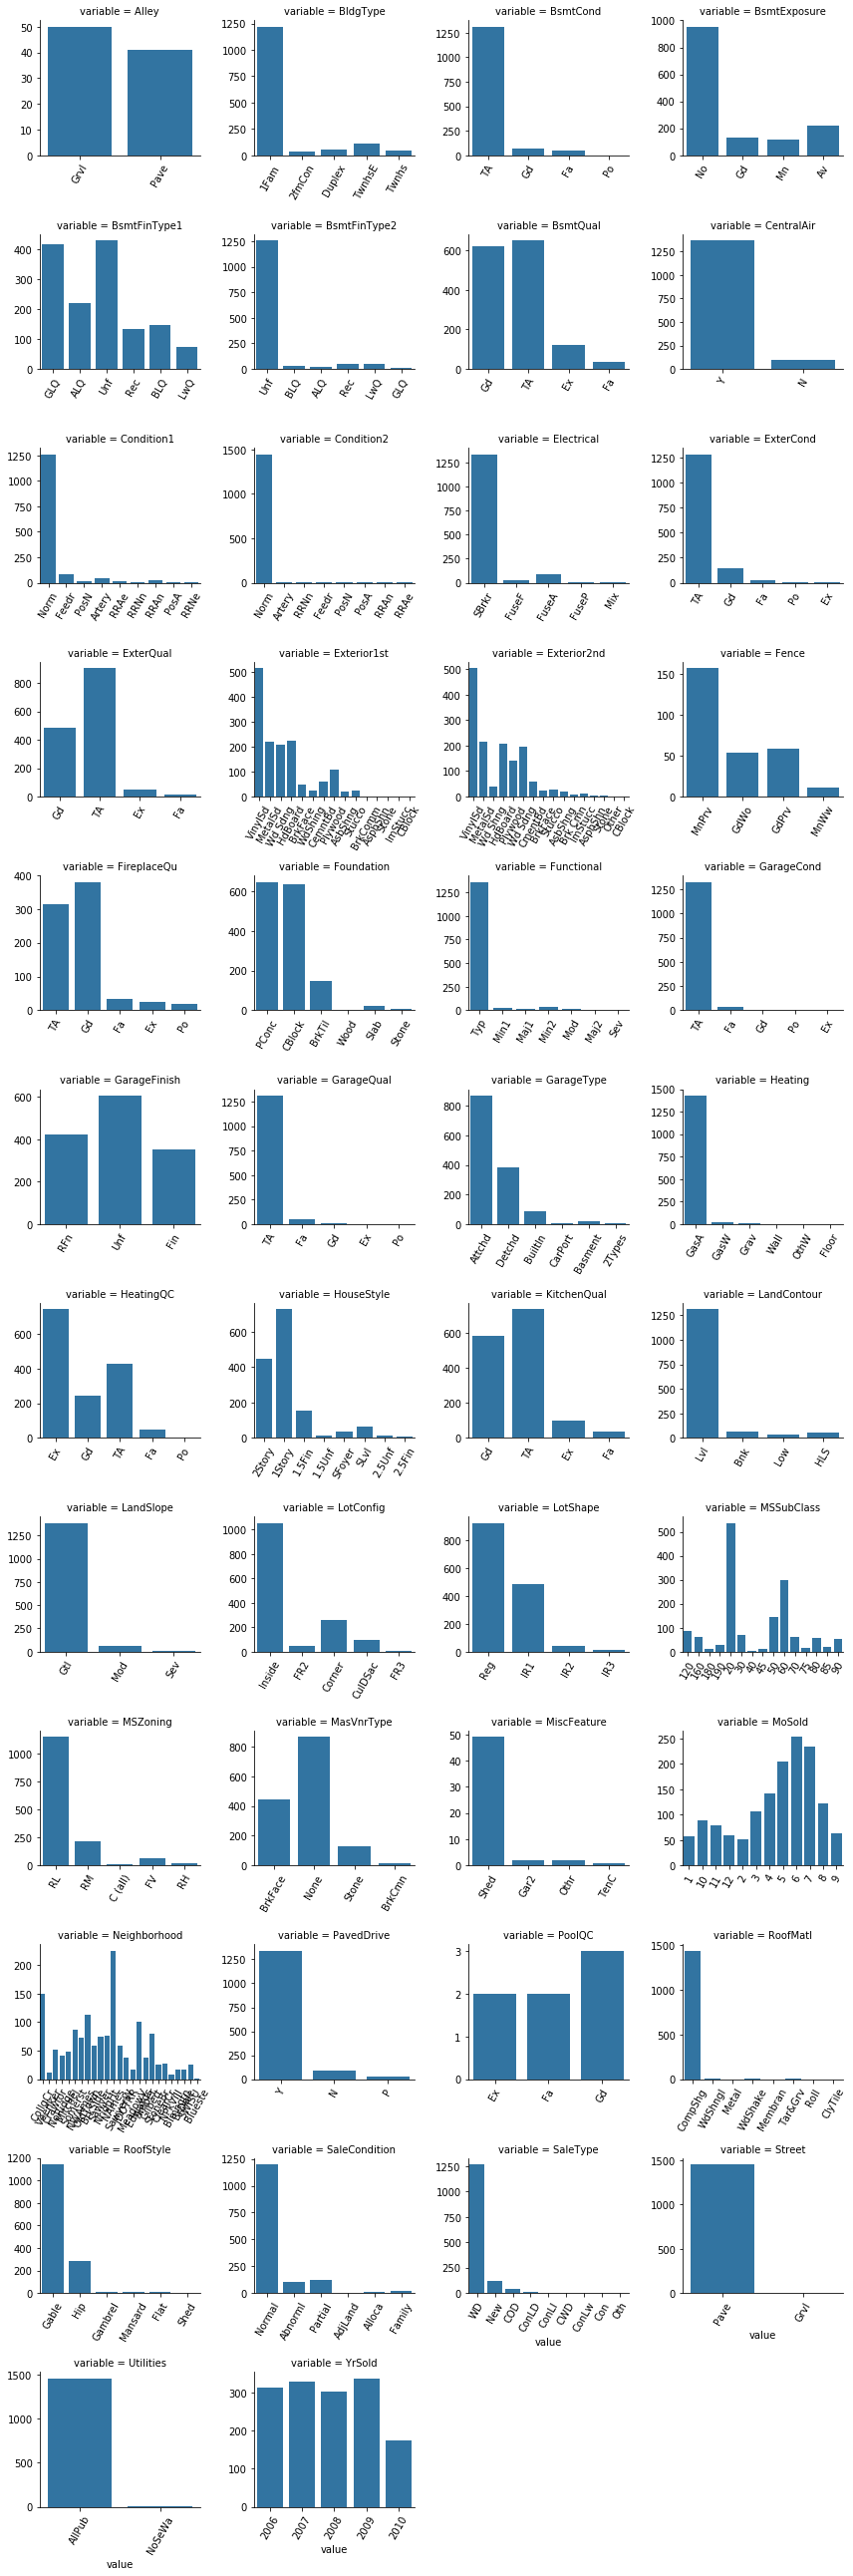

In [20]:
f = pd.melt(train, value_vars = sorted(categorical_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex = False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(), rotation =60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

* Using the text file describing data, look to see which features are nominal & ordinal
* Find a list of ordinal features to convert into numbers

In [21]:
ordinal_data = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1',\
'BsmtFinType2','BsmtQual','ExterCond','ExterQual','FireplaceQu',\
 'Functional','GarageCond', 'GarageFinish','GarageQual', 'HeatingQC',\
 'KitchenQual','PavedDrive','PoolQC','Utilities','Fence']

* Fill in missing data from the Ordinal_data
* Fill all missing data with 0

In [22]:
#fill missing values with 0
train[ordinal_data] = train[ordinal_data].fillna(0)

In [23]:
for col in ordinal_data:
    lbl = LabelEncoder() 
    lbl.fit(list(train[col].values)) 
    train[col] = lbl.transform(list(train[col].values))

In [24]:
num_cat()

There are 54 numerical features and 27 categorical features in the training data


C:\Users\jshyo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jshyo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


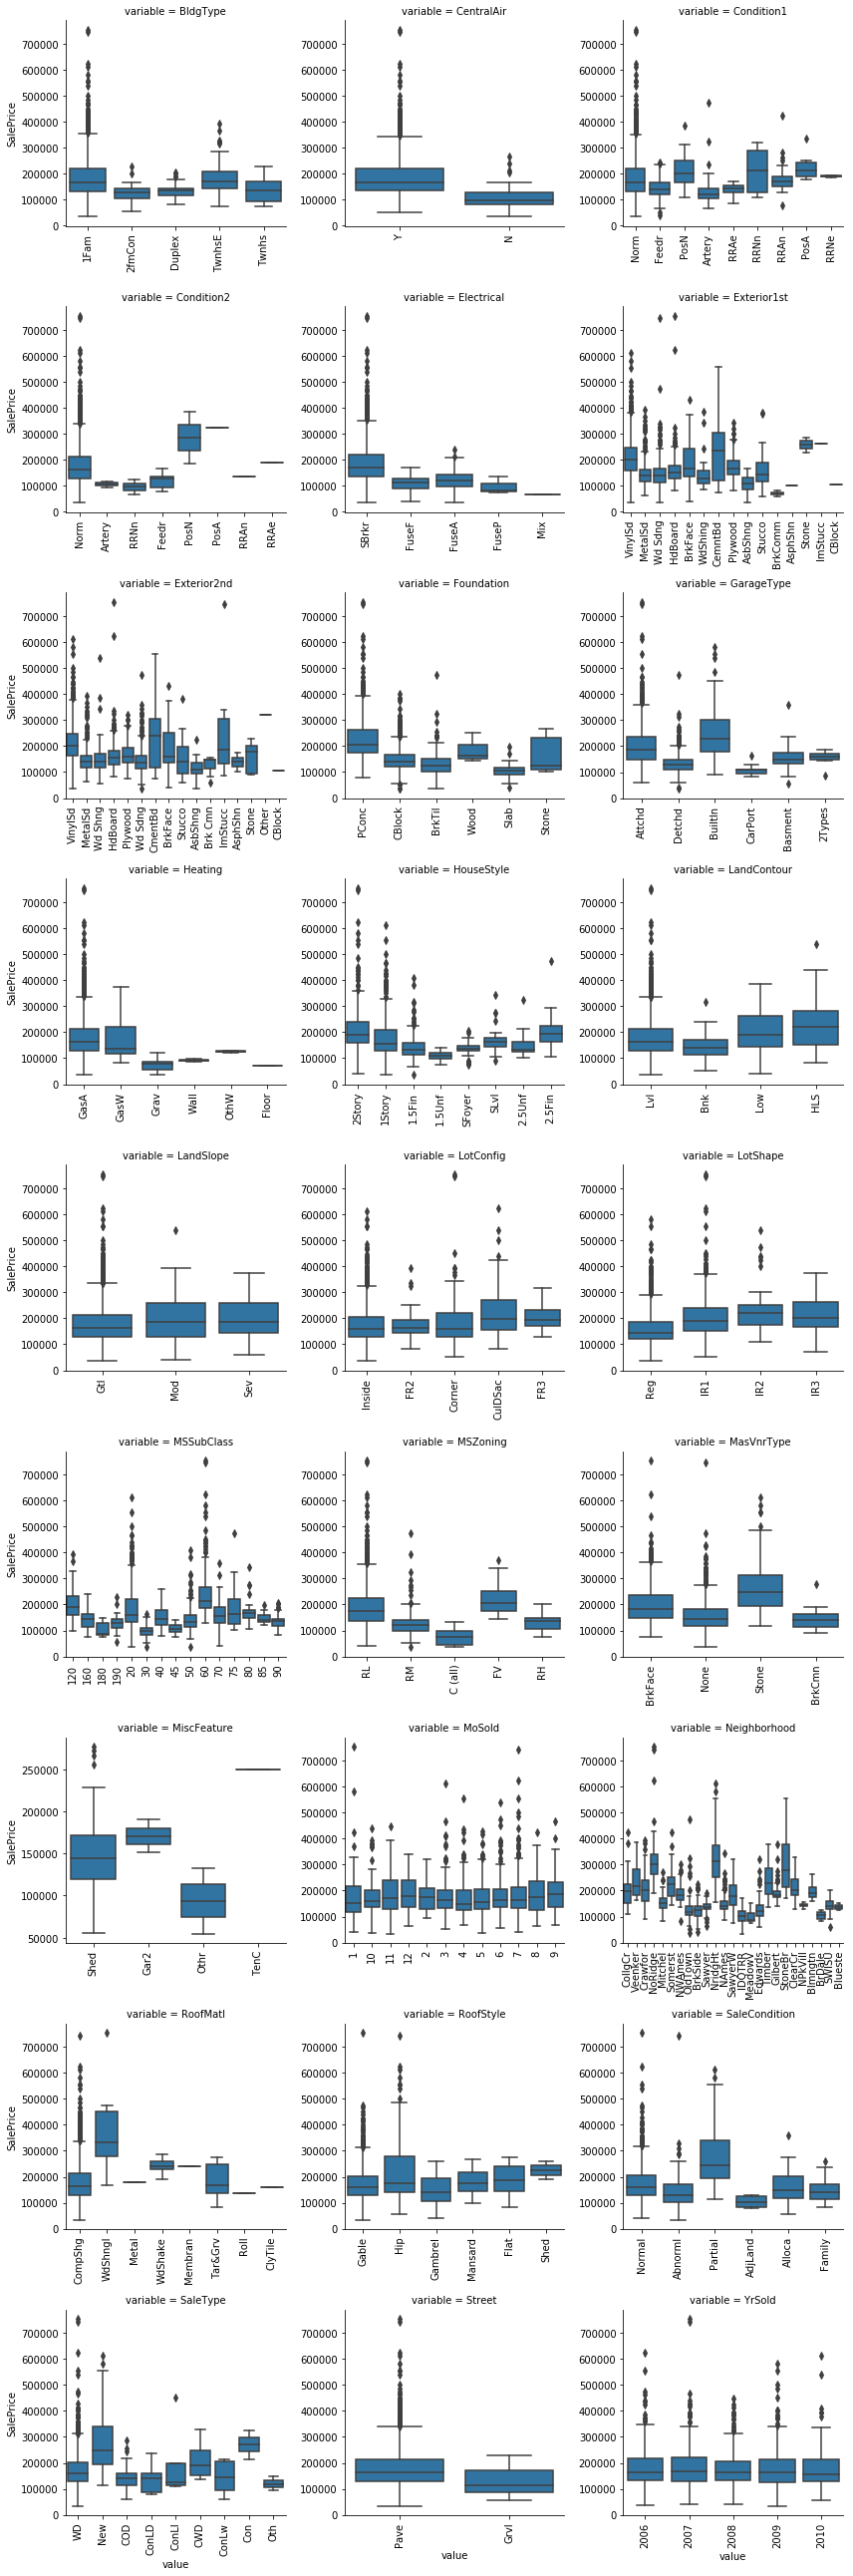

In [25]:
f = pd.melt(train, id_vars = ['SalePrice'], value_vars = sorted(categorical_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 3, sharex = False, sharey=False, size=4)
plt.xticks(rotation='vertical')
g = g.map(sns.boxplot,'value','SalePrice')
[plt.setp(ax.get_xticklabels(), rotation =90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

* Find the ANOVA to check differences among each value in a feature
* Which supports or rejects the null hypothesis?
* P < 0.05 rejects the null hypothesis. Each feature does have some significance towards the SalePrice[Target].

In [26]:
cat_features = categorical_data.columns
#fill null with missing so anova can run
train[cat_features]=train[cat_features].fillna('Missing')

anova = {'feature': [], 'f':[],'p':[]}
for cat in cat_features:
    group_prices = []
    for group in train[cat].unique():
        group_prices.append(train[train[cat] == group]['SalePrice'].values)
    f , p  = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p',inplace = True)        

In [27]:
anova

,feature,f,p
7,Neighborhood,71.784865,1.558600e-225
17,Foundation,100.253851,5.791895e-91
21,GarageType,80.379992,6.117026e-87
0,MSSubClass,33.732076,8.662166e-79
16,MasVnrType,84.672201,1.054025e-64
26,SaleCondition,45.578428,7.988268e-44
14,Exterior1st,18.611743,2.586089e-43
15,Exterior2nd,17.500840,4.842186e-43
25,SaleType,28.863054,5.039767e-42
1,MSZoning,43.840282,8.817634e-35


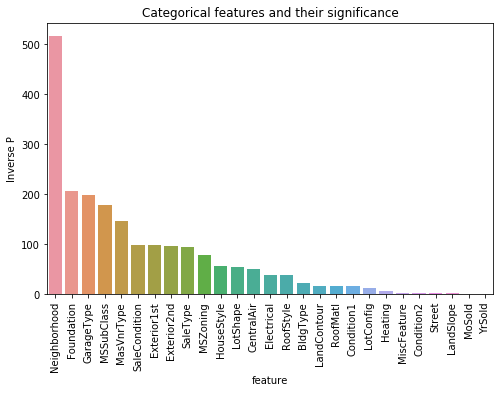

In [28]:
plt.figure(figsize = (8,5))
ax = sns.barplot(anova['feature'], np.log(1./anova['p']))
ax.set_title('Categorical features and their significance')
ax.set_ylabel('Inverse P')
plt.xticks(rotation = 90)
plt.show()

In [29]:
missing_values = (train[cat_features]== 'Missing').sum().sort_values()

In [30]:
print(missing_values[missing_values > 0])
#fill Electrical Value with the mode
train.loc[train.Electrical == 'Missing', 'Electrical']  == train.Electrical.mode()[0]

Electrical        1
MasVnrType        8
GarageType       81
MiscFeature    1406
dtype: int64


1379    False
Name: Electrical, dtype: bool

In [31]:
missing_data = train.isnull().sum()

In [32]:
missing_data[missing_data>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

### fill in the null values

In [33]:
#fill LotFrontage with the median but first grouped by Neightborhood
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
#fill GarageYrBuilt with the value zero
train['GarageYrBlt'].fillna(0, inplace = True)
#fill in MasVnrArea with the value zero
train['MasVnrArea'].fillna(0, inplace = True)

In [34]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Missing      8
Name: MasVnrType, dtype: int64

In [35]:
#correct values that was filled with "Missing" with none
train.MasVnrType.replace({'Missing': 'None'}, inplace = True)
#correct values and fill with the mean
train.loc[(train.MasVnrType == 'None') & (train.MasVnrArea > 1), 'MasVnrType'] == 'BrkFace' # most common type
train.loc[(train.MasVnrType == 'None') & (train.MasVnrArea == 1), 'MasVnrArea'] == 0 # 1sqft basically means zero sqft
for vnr_type in train.MasVnrType.unique():
    train.loc[(train.MasVnrType == vnr_type) & (train.MasVnrArea == 0),'MasVnrArea'] =\
    train[train.MasVnrType == vnr_type].MasVnrArea.mean()

In [38]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

### check to see if there are any duplicates
* check on the Id column

In [40]:
print('# of duplicated Id in Train set: {}'.format(train.duplicated('Id').sum()))
print('# of duplicated Id in Test set: {}'.format(test.duplicated('Id').sum()))

# of duplicated Id in Train set: 0
# of duplicated Id in Test set: 0


### check for outliers

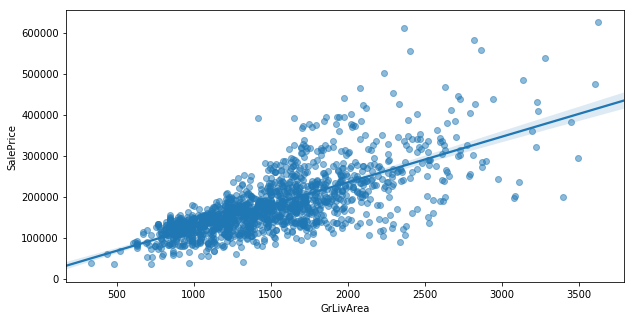

In [48]:
plt.figure(figsize = (10,5))
sns.regplot(train.GrLivArea, train.SalePrice,scatter_kws ={'alpha': 0.5})
plt.show()

Notice the outliers in the GrLivArea. The values for 4000 sqft and above need to be removed.

In [46]:
train.drop(train[train.GrLivArea >= 4000].index, inplace = True)

In [51]:
train["TotalSF"] = train['TotalBsmtSF'] + train['GrLivArea']
train["TotalFloorSF"] = train['1stFlrSF'] + train['2ndFlrSF']
train["TotalPorchSF"] = train['OpenPorchSF'] + train['EnclosedPorch'] +\
                        train['3SsnPorch'] + train['ScreenPorch']

In [56]:
train['HasBasement'] = train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
train['Remodeled'] = (train.YearRemodAdd != train.YearBuilt).astype(np.int64)
train['NewHouse'] = (train.YearBuilt > 2000).astype(np.int64)
train['WasCompleted'] = (train.SaleCondition != 'Partial').astype(np.int64)

In [57]:
bool_features = ['HasBasement','HasGarage','HasPorch', 'HasPool','Remodeled','NewHouse','WasCompleted']

In [58]:
num_cat()

There are 64 numerical features and 27 categorical features in the training data


In [59]:
num_features = numerical_data
cat_features = categorical_data

In [61]:
num_features = [f for f in num_features if f not in bool_features]

In [62]:
num_features

['Id',
 'LotFrontage',
 'LotArea',
 'Alley',
 'Utilities',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'SalePrice',
 'TotalSF',
 'TotalFloorSF',
 'TotalPorchSF']

In [65]:
train["TotalBathrooms"] = train.FullBath + .5 * train.HalfBath + \
                        train.BsmtFullBath + .5 * train.BsmtHalfBath

In [66]:
numerical_data.shape

(1456, 64)

In [67]:
num_cat()

There are 65 numerical features and 27 categorical features in the training data


In [68]:
num_features = numerical_data
cat_features = categorical_data
num_features = [f for f in num_features if f not in bool_features]

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 92 columns):
Id                1456 non-null int64
MSSubClass        1456 non-null object
MSZoning          1456 non-null object
LotFrontage       1456 non-null float64
LotArea           1456 non-null int64
Street            1456 non-null object
Alley             1456 non-null int64
LotShape          1456 non-null object
LandContour       1456 non-null object
Utilities         1456 non-null int64
LotConfig         1456 non-null object
LandSlope         1456 non-null object
Neighborhood      1456 non-null object
Condition1        1456 non-null object
Condition2        1456 non-null object
BldgType          1456 non-null object
HouseStyle        1456 non-null object
OverallQual       1456 non-null int64
OverallCond       1456 non-null int64
YearBuilt         1456 non-null int64
YearRemodAdd      1456 non-null int64
RoofStyle         1456 non-null object
RoofMatl          1456 non-null object
Ext

In [80]:
# Log on each numerical feature in Train. To unskew the features
features = num_features + ['SalePrice']
for f in features:
    train.loc[:,f] = np.log1p(train[f])

In [84]:
y = train['SalePrice']
train.drop('SalePrice',axis =1, inplace = True)
train.drop('Id', axis =1, inplace = True)

model_data = pd.get_dummies(train).copy()

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 90 columns):
MSSubClass        1456 non-null object
MSZoning          1456 non-null object
LotFrontage       1456 non-null float64
LotArea           1456 non-null float64
Street            1456 non-null object
Alley             1456 non-null float64
LotShape          1456 non-null object
LandContour       1456 non-null object
Utilities         1456 non-null float64
LotConfig         1456 non-null object
LandSlope         1456 non-null object
Neighborhood      1456 non-null object
Condition1        1456 non-null object
Condition2        1456 non-null object
BldgType          1456 non-null object
HouseStyle        1456 non-null object
OverallQual       1456 non-null float64
OverallCond       1456 non-null float64
YearBuilt         1456 non-null float64
YearRemodAdd      1456 non-null float64
RoofStyle         1456 non-null object
RoofMatl          1456 non-null object
Exterior1st       1456 non-

In [87]:
model_data.shape

(1456, 268)

Split train dataset into a test and train set using train_test_split from Sklearn

In [91]:
X_train, X_test, y_train, y_test = train_test_split(model_data.copy(), y, test_size = 0.3, random_state =42)
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val',y_test.shape)

X_train: (1019, 268)
X_val: (437, 268)
y_train: (1019,)
y_val (437,)


In [94]:
#standardize the numerical features
#make feature means 0 and standard deviation 1
num_features.remove('Id')
num_features.remove('SalePrice')
stdcs = StandardScaler()
X_train.loc[:,num_features] = stdcs.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdcs.fit_transform(X_test[num_features])

In [95]:
from sklearn.model_selection import cross_val_score
def rsme(model,X,y):
    cv_scores = -cross_val_score(model,X,y, scoring = 'neg_mean_squared_error',cv=10)
    return np.sqrt(cv_scores)

In [97]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 25.0], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv = 5, param_grid = param_grid, scoring = 'neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

#hone in
param_grid = {'alpha': [x/100.0 * alpha for x in range(50,150,5)], 'max_iter': [50000]}
lass= GridSearchCV(Lasso(), cv = 5, param_grid= param_grid, scoring = 'neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -- Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(\
     rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -- Train RSME: 0.00876 | Test RSME: 0.00968 | alpha: 0.00010


In [98]:
lasso

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
coefs = pd.Dataframe()